In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [2]:
# Specify the path to your CSV files
csv_files_path = '/Users/leo/Documents/College/Research/CHANGES_Xray_analysis/*.csv'
galaxy_path = '/Users/leo/xray_analysis/changes_2020/NGC*'

# Use glob to get a list of all CSV files in the specified path
csv_files = sorted(glob.glob(csv_files_path))
galaxy = glob.glob(galaxy_path)

# Define the criteria for filtering
column_name = 'Brd_Cts'
counts_threshold = 100
source_threshold = 10

In [3]:
# Initialize an empty dictionary to store the filtered DataFrames
filtered_dfs = {}
bright_galaxies = []
filt_src_cnt = []

# Iterate through each CSV file with an index
for idx, file_path in enumerate(csv_files):
    galaxy_name = os.path.splitext(os.path.basename(file_path))[0].split('_')[0]
    df = pd.read_csv(file_path)
    filtered_df = df[df[column_name] > counts_threshold]
    # Check if the filtered dataframe meets the source threshold criterion
    if len(filtered_df) >= 10:
        filtered_df.insert(1, 'Galaxy', galaxy_name)
        # Store the filtered DataFrame in the dictionary
        filtered_dfs[galaxy_name] = filtered_df
        bright_galaxies.append(galaxy_name)
        filt_src_cnt.append(len(filtered_df))
        print(f'{galaxy_name}: {len(filtered_df)}')

NGC0891: 46
NGC2992: 13
NGC3079: 22
NGC3556: 22
NGC3628: 13
NGC3877: 24
NGC4013: 20
NGC4157: 13
NGC4217: 10
NGC4565: 14
NGC4594: 58
NGC4631: 13
NGC5775: 19
NGC5907: 16


In [4]:
# Define function to calculate the distance from each source to the galaxy center
def d25(ra_src, dec_src, ra_c, dec_c, smaj, smin, theta):
    return (((ra_src - ra_c) * np.sin(theta) + (dec_src - dec_c) * np.cos(theta))**2 / smaj**2 + 
            ((ra_src - ra_c) * np.cos(theta) - (dec_src - dec_c) * np.sin(theta))**2 / smin**2)

# Define galactic parameters
ra = np.array([35.639224, 146.425211, 150.490848, 167.879042, 170.070710, 176.532078, 179.630750, 182.768208, 183.962083, 189.086584, 189.997633, 190.533375, 223.489988, 228.974042])
dec = np.array([42.349146, -14.326382, 55.679789, 55.674111, 13.589684, 47.494346, 43.946583, 50.484667, 47.091778, 25.987675, -11.623054, 32.541500, 3.544458, 56.328771])
arcsec_major = np.array([809.40, 212.90, 476.60, 522.60, 887.50, 329.70, 314.90, 405.60, 314.90, 950.90, 522.60, 929.30, 250.10, 755.40])
arcsec_major_unc = np.array([18.90, 10.00, 11.10, 12.20, 20.70, 15.50, 14.80, 19.10, 14.80, 22.20, 12.20, 21.60, 11.80, 17.60])
arcsec_minor = np.array([150.55, 65.79, 86.74, 134.31, 177.50, 77.15, 61.41, 81.12, 92.90, 128.37, 212.70, 161.70, 60.02, 83.09])
arcsec_minor_unc = np.array([7.28, 6.39, 4.29, 6.27, 7.99, 5.60, 4.41, 5.68, 4.41, 2.85, 9.93, 7.43, 4.25, 3.78])
inc = np.array([22, 23, 165, 80, 104, 35, 66, 66, 50, 136, 90, 86, 146, 155])

# Convert arcseconds to degrees
deg_semimajor = ((arcsec_major + arcsec_major_unc) / 2) / 3600
deg_semiminor = ((arcsec_minor + arcsec_minor_unc) / 2) / 3600
inc_rads = np.radians(inc)


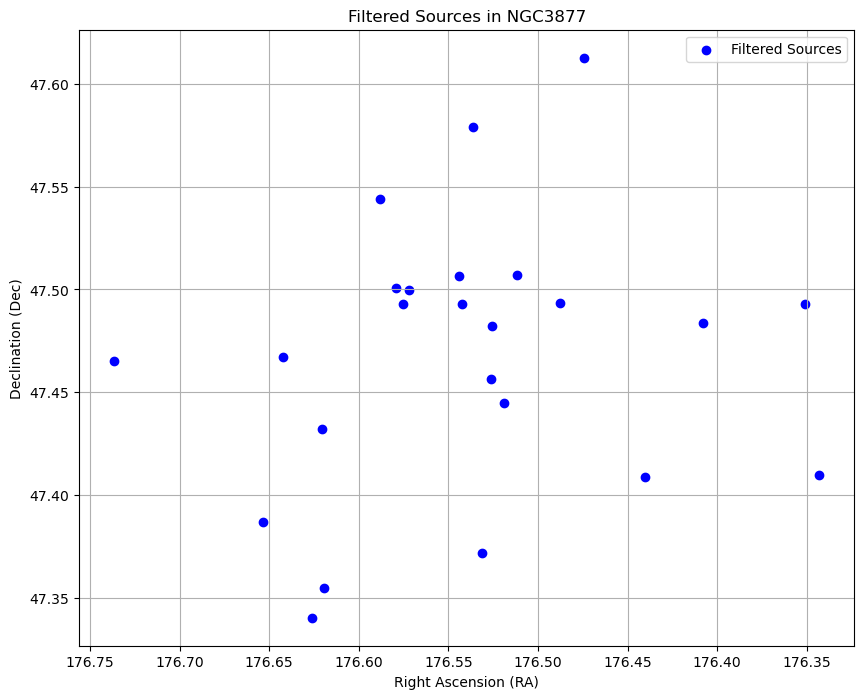

In [5]:
galaxy_name_to_plot = bright_galaxies[5]  # Choose the first bright galaxy for plotting

# Retrieve the DataFrame for the chosen galaxy
galaxy_df_to_plot = filtered_dfs[galaxy_name_to_plot]

# Initialize the plot
plt.figure(figsize=(10, 8))

# Plot the sources
plt.gca().invert_xaxis()
plt.scatter(galaxy_df_to_plot['RA'], galaxy_df_to_plot['DEC'], marker='o', color='blue', label='Filtered Sources')
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.title(f'Filtered Sources in {galaxy_name_to_plot}')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Iterate through each bright galaxy
for i, galaxy_name in enumerate(bright_galaxies):
    # Get the galaxy parameters for the current galaxy
    ra_c = ra[i]
    dec_c = dec[i]
    smaj = deg_semimajor[i]
    smin = deg_semiminor[i]
    theta = inc_rads[i]

    # Retrieve the corresponding DataFrame for the current galaxy
    galaxy_df = filtered_dfs[galaxy_name]
    
    # Count sources before ellipse filtering
    count_before = len(galaxy_df)
    
    # Calculate the distance for each source in the galaxy DataFrame
    galaxy_df['Distance'] = d25(galaxy_df['RA'], galaxy_df['DEC'], ra_c, dec_c, smaj, smin, theta)
    
    # Remove sources outside the D25 ellipse (where Distance > 1)
    galaxy_df = galaxy_df[galaxy_df['Distance'] <= 1].drop(columns=['Distance'])
    
    # Count sources after ellipse filtering
    count_after = len(galaxy_df)
    
    # Update the filtered DataFrame for the current galaxy in the dictionary
    filtered_dfs[galaxy_name] = galaxy_df
    
    # Print count of sources before and after ellipse filtering
    print(f"{galaxy_name}: Bright Sources: {count_before}, On-Disk Bright Sources: {count_after}")

NGC0891: Bright Sources: 46, On-Disk Bright Sources: 19
NGC2992: Bright Sources: 13, On-Disk Bright Sources: 2
NGC3079: Bright Sources: 22, On-Disk Bright Sources: 5
NGC3556: Bright Sources: 22, On-Disk Bright Sources: 12
NGC3628: Bright Sources: 13, On-Disk Bright Sources: 6
NGC3877: Bright Sources: 24, On-Disk Bright Sources: 3
NGC4013: Bright Sources: 20, On-Disk Bright Sources: 2
NGC4157: Bright Sources: 13, On-Disk Bright Sources: 3
NGC4217: Bright Sources: 10, On-Disk Bright Sources: 2
NGC4565: Bright Sources: 14, On-Disk Bright Sources: 6
NGC4594: Bright Sources: 58, On-Disk Bright Sources: 25
NGC4631: Bright Sources: 13, On-Disk Bright Sources: 7
NGC5775: Bright Sources: 19, On-Disk Bright Sources: 6
NGC5907: Bright Sources: 16, On-Disk Bright Sources: 5


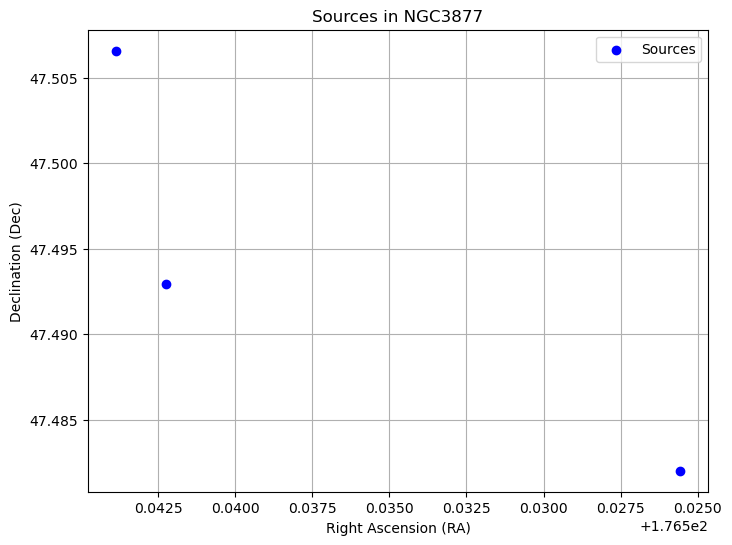

In [7]:
# Choose a galaxy name
galaxy_name_to_plot = 'NGC3877'  # Replace 'Galaxy_Name' with the name of the galaxy you want to plot

# Retrieve the DataFrame for the chosen galaxy
galaxy_df_to_plot = filtered_dfs[galaxy_name_to_plot]

# Plot the sources
plt.figure(figsize=(8, 6))
plt.gca().invert_xaxis()
plt.scatter(galaxy_df_to_plot['RA'], galaxy_df_to_plot['DEC'], marker='o', color='blue', label='Sources')
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.title(f'Sources in {galaxy_name_to_plot}')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Initialize an empty list to store filtered DataFrames for all galaxies
filtered_dfs_all = []

# Iterate through each bright galaxy
for galaxy_name in bright_galaxies:
    # Retrieve the filtered DataFrame for the current galaxy
    galaxy_df = filtered_dfs[galaxy_name]
    
    # Append the filtered DataFrame to the list
    filtered_dfs_all.append(galaxy_df)

# Concatenate all filtered DataFrames into a single DataFrame
aggregated_df = pd.concat(filtered_dfs_all, ignore_index=True)

# Save the aggregated DataFrame to a new CSV file
aggregated_file_path = '/Users/leo/Documents/Masters/Research/bright_d25_sources.csv'
#aggregated_df.to_csv(aggregated_file_path, index=False)